### Mutual information technique

Mutual information is a function metric(construct a ranking with a feature utility metric) measure relationship between a feature and the target. Then we can pick up smaller set of most useful features to develop our model, helping us more confidence that our time will spent on.

Mutual information look alike with correlation in that it measures a relationship between two variables, however Mutual information technique detects any kind of relationship, while correlation only detects linear relationships.

#### --------------------
Mutual information is a great general-purpose metric and especially useful at the start of feature development when we might not know what model we'd like to use yet
#### --------------------

mutual information is easy to use and interpret, computationally efficient, theoretically well-founded, resistant to overfitting, and able to detect any kind of relationship

### What mutual information measures?

* Mutual Information(MI) describes relationships in term of uncertainty.
* MI can help us to understand the relative potential of a feature as a predictor of the target
* MI can not detect interactions between features. It is univariate metric. It is possible for a feature to be very informative when interacting with other features, but not so informative all alone.
* The actual usefulness of a feature depends on the model we use it with. A feature is only useful to the exntent that its relationship with the target is one our model can learn. Just because a feature has a high MI score does not mean our model will be able to do anything with that information. We may need to transform the feature first to expose the relationship.

### Mutual Information on 1985 Automobiles, car's price prediction

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv('./data/Automobile_data.csv')
#df.drop(columns='normalized-losses', inplace=True)
df.drop(index=df[df.price == '?'].index, inplace=True)
df.drop(index=df[df.horsepower == '?'].index, inplace=True)
df['horsepower'] = df['horsepower'].astype(int)
df['price'] =df['price'].astype(int)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### NOTE
The scikit-learn algorithm for MI treats discrete features differently from continuous features, we need to tell it which are which. Any feature that must has a float dtype is not discrete. Categoricals (object or categorical dtype) can be treated as discrete by giving them a label encoding)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [165]:
X = df.copy()
y = X.pop("price")

#Label encoding for categoricals
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check before using MI)
discrete_features = X.dtypes == int

#### Use scikit-learn mutual information metrics
There are two MI in scikit-learn, one for real-valued targets (contiuous targets) - mutual_info_regression, and on for catagorical targets - mutual_info_classif). Our target, price is real-valued.

In [166]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb-weight          1.512455
highway-mpg          0.940887
bore                 0.707800
length               0.581161
fuel-system          0.479656
num-of-cylinders     0.335100
compression-ratio    0.191726
body-style           0.063986
num-of-doors         0.000972
Name: MI Scores, dtype: float64

#### Visualization

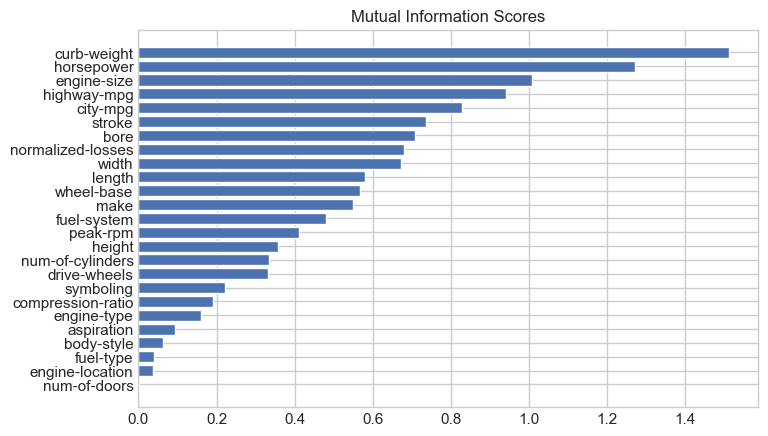

In [167]:
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8,5))
plot_mi_score(mi_scores)

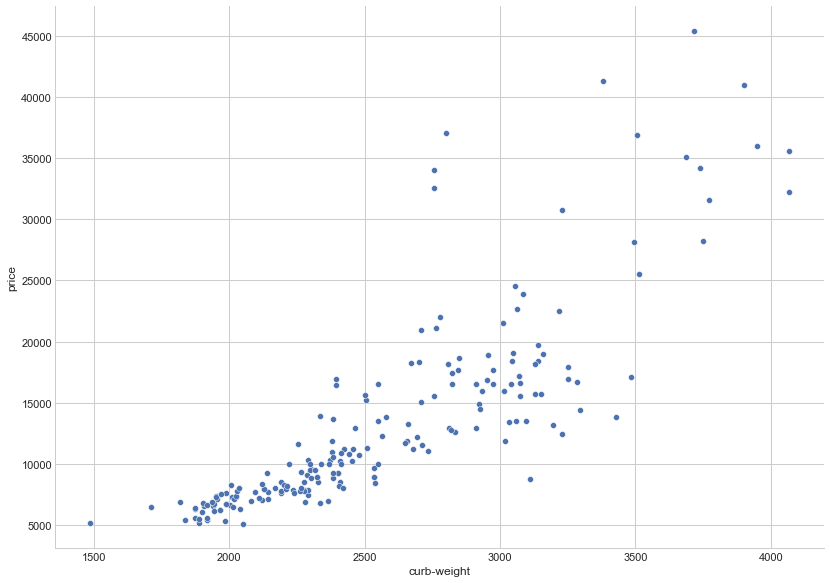

In [168]:
#plot relationship betweeen curb-weight and price
sns.relplot(x='curb-weight', y='price', data=df, height=8.27, aspect=11.7/8.27)

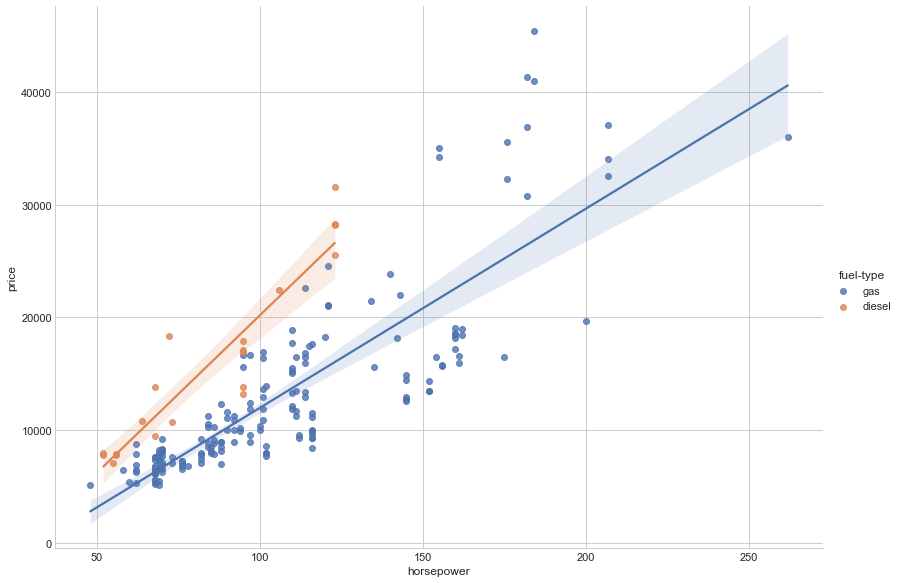

In [171]:
#compare to fuel-type
sns.lmplot(x='horsepower', y='price', hue='fuel-type', data=df, height=8.27, aspect=11.7/8.27);

horsepower and fuel-type interact with each other, these two features together might increase the predictive power to our model

### Example of house price on Ames dataset